# **Reinforcement Learning: Pengenalan**

Di dalam Tutorial ini, akan menjelaskan penggunaan Reinforcement Learning dasar yang akan digunakan, dan juga untuk memenuhi tugas kuliah Advance Machine Learning. Referensi yang akan digunakan di dalam tutorial ini akan berbasis dari buku dan juga paper. untuk kasus yang akan dijelaskan disini adalah penggunaan Reinforcement Learning yang akan menerapkan metode Q-learning tabular klasik untuk [Frozen Lake](https://gym.openai.com/envs/FrozenLake-v0/) klasik Puzzle. 

![alt text](https://media2.giphy.com/media/46ib09ZL1SdWuREnj3/giphy.gif?cid=3640f6095c6e92762f3446634d90bc65) ![alt text](https://media0.giphy.com/media/d9QiBcfzg64Io/200w.webp?cid=3640f6095c6e93e92f30655873731752)![alt text](https://i.gifer.com/GpAY.gif)

Reinforcement Learning bisa beroperasi dengan melakukan indentifikasi pola yang akan digunakan secara optimal, di dalam konteks dari masalah masalah yang diberikan, sehingga agen pada reinforcement learning dapat membuat keputusan terbaik untuk langkah berikutnya.

## **Q-Learning**

### Tabular Q-Learning with Frozen Lake

In [1]:
import gymnasium as gym
import numpy as np

# You need this part
# S:Start, F:Frozen, H:Hole, G:Goal
map = ["SFFF", "FHFH", "FFFF", "HFFG"]
# is_slippery=True means stochastic and is_slippery=False means deterministic
env = gym.make('FrozenLake-v1', render_mode="human", desc=map, map_name="4x4", is_slippery=True)
env.reset()
env.render()

# You need to find the policy using both value iteration and policy iteration
# You may not need this part!
action = ["left", "down", "right", "up"]
ncols = 4
nrows = 4
e = 0.001
max_iterations = 1000 #  maximum iterations if there is an infinite loop

# GIVEN
# A sample policy to make the following while loop works
# policy = [1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0]

#  Initializing the variables
n_states = env.observation_space.n # the total number of states in the environment
n_actions = env.action_space.n # number of possible actions in the environment
gamma_list = [0.8] # substitute with ('0.5' and '1')

'''
This function implements the value iteration algorithm to compute the optimal policy.

It initializes the state value function (V) for all states to 0 and then iteratively updates the values until they converge to the optimal values.
The loop continues until the maximum change in any value is less than the error threshold (e).

Parameters
----------
env : an object of a Gym environment class
    Given environment

gamma : float
    Discount factor

e : float
    Error threshold

Returns
-------
policy
    1-D NumPy array of integers
    Each element in the array represents the best action to take in the corresponding state to maximize the expected cumulative reward
    The optimal policy

'''
def value_iteration(env, gamma, e):
    V = np.zeros(n_states)

    # check for convergence
    # runs until 'delta' is less than a predefined value 'e'
    while True:
        delta = 0   # the maximum absolute difference between the old value of a state v and the new value V[s] computed in the current iteration
        for s in range(n_states):
            v = V[s]
            q_vals = np.zeros(n_actions)
            for a in range(n_actions):
                for p, s_next, r, done in env.P[s][a]:
                    q_vals[a] += p * (r + gamma * V[s_next])
                V[s] = max(q_vals)
            delta = max(delta, abs(v - V[s]))
        if delta < e:
            break
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        q_vals = np.zeros(n_actions)
        for a in range(n_actions):
            for p, s_next, r, done in env.P[s][a]:
                q_vals[a] += p * (r + gamma * V[s_next])              
            policy[s] = np.argmax(q_vals)
    return policy

'''
This function implements the policy iteration algorithm to compute the optimal policy.

It initializes a random policy for all states, then iteratively evaluates and improves the policy until convergence.
In the evaluation step, it computes the state values for the given policy until they converge to the optimal values.
In the improvement step, it updates the policy for each state by selecting the action that maximizes the expected value of the next state.

Parameters
----------
env : an object of a Gym environment class
    Given environment

gamma : float
    Discount factor

e : float
    Error threshold

Returns
-------
policy
    1-D NumPy array of integers
    Each element in the array represents the best action to take in the corresponding state to maximize the expected cumulative reward.
    The optimal policy.

'''
def policy_iteration(env, gamma, e):
    num = 0 # to check for the iterations
    policy = np.zeros(n_states, dtype=int)
    print()
    print("policy:", policy) # Add print statement to see policy at each step
    print() 
    while True:
        V = np.zeros(n_states)
        while True:
            delta = 0
            #if num > max_iterations:   # stops iteration at 1000 but the GUI hangs
            #    break                
            for s in range(n_states):
                v = V[s]
                a = policy[s]
                q_val = 0
                for p, s_next, r, done in env.P[s][a]:
                    q_val += p * (r + gamma * V[s_next])
                V[s] = q_val
                delta = max(delta, abs(v - V[s]))
            num += 1 # increment to keep count
            print("V: " + str(num))
            print(V.reshape(4, 4)) # Add print statement to see V values at each step
            if delta < e:
                break
        policy_stable = True

        # check for convergence
        # old policy at each state is saved in 'old_action', and then the Q-values for each action at the state are evaluated using the updated 
        # value function 'V'. The policy is then updated to choose the action with the highest Q-value, and if the updated policy at any state 
        # is different from the old policy, then policy_stable is set to False.
        for s in range(n_states):
            old_action = policy[s]
            q_vals = np.zeros(n_actions)
            for a in range(n_actions):
                for p, s_next, r, done in env.P[s][a]:
                    q_vals[a] += p * (r + gamma * V[s_next])
            policy[s] = np.argmax(q_vals)
            if old_action != policy[s]:
                policy_stable = False
        if policy_stable: # if 'policy_stable' remains True after the loop, then the policy is considered to have converged and the iteration loop is broken
            break
        print()
        print("policy:", policy) # Add print statement to see policy at each step
        print()  
    return policy

# Loop to print out the optimal policies:
# Both policies are represented as arrays of integers, with each index corresponding to a state in the environment and the value at that 
# index representing the action to be taken in that state according to the optimal policy
for gamma in gamma_list:
    print("gamma: ", gamma)
    value_policy = value_iteration(env, gamma, e) #the optimal policy obtained by running the value iteration algorithm on the environment
    print("Value iteration policy:", value_policy)
    print()
    policy_policy = policy_iteration(env, gamma, e) #the optimal policy obtained by running the policy iteration algorithm on the environmeny
    print() 
    print("Policy iteration policy:", policy_policy)
    print()
    print("------------------------")


# GIVEN
# This part uses the found policy to interact with the environment.
# You don't need to change anything here.

s = 0
goal = ncols * nrows - 1
while s != goal:
    a = value_policy[s]
    s, r, t, f, p = env.step(a)
    if t == True and s != goal:
        env.reset()
        s = 0
print("END")
print("------------------------")

gamma:  0.8
Value iteration policy: [1 3 0 3 0 0 0 0 3 1 1 1 0 2 2 0]


policy: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

V: 1
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.33333333]
 [0.         0.         0.         0.        ]]
V: 2
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.33333333]
 [0.         0.         0.         0.        ]]

policy: [0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0]

V: 3
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.33333333]
 [0.         0.         0.33333333 0.        ]]
V: 4
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.17777778 0.46962963]
 [0.         0.         0.42222222 0.        ]]
V: 5
[[0.         0.         0.         0.        ]
 [0.         

In [2]:
import gymnasium as gym
import numpy as np

# Mendefinisikan peta lingkungan FrozenLake
map = ["SFFF", "FHFH", "FFFF", "HFFG"]
# Membuat lingkungan FrozenLake dengan peta yang telah ditentukan
env = gym.make('FrozenLake-v1', render_mode="human", desc=map, map_name="4x4", is_slippery=True)
# Mereset lingkungan
env.reset()
# Menampilkan lingkungan
env.render()

# Mendefinisikan beberapa variabel yang dibutuhkan
gamma_list = [0.8] # Faktor diskon
ncols = 4 # Jumlah kolom pada peta lingkungan
nrows = 4 # Jumlah baris pada peta lingkungan
e = 0.001 # Batas kesalahan
n_states = env.observation_space.n # Jumlah total state dalam lingkungan
n_actions = env.action_space.n # Jumlah total aksi yang mungkin dalam lingkungan

def value_iteration(env, gamma, e):
    # Inisialisasi fungsi nilai state (V) untuk semua state menjadi 0
    V = np.zeros(n_states)

    # Loop sampai konvergen
    while True:
        delta = 0
        for s in range(n_states):
            v = V[s]
            q_vals = np.zeros(n_actions)
            for a in range(n_actions):
                for p, s_next, r, done in env.P[s][a]:
                    q_vals[a] += p * (r + gamma * V[s_next])
            V[s] = max(q_vals)
            delta = max(delta, abs(v - V[s]))
        if delta < e:
            break

    # Menghasilkan policy optimal berdasarkan fungsi nilai state (V)
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        q_vals = np.zeros(n_actions)
        for a in range(n_actions):
            for p, s_next, r, done in env.P[s][a]:
                q_vals[a] += p * (r + gamma * V[s_next])
        policy[s] = np.argmax(q_vals)

    return policy

def policy_iteration(env, gamma, e):
    # Inisialisasi policy secara acak
    policy = np.zeros(n_states, dtype=int)

    # Loop sampai konvergen
    while True:
        V = np.zeros(n_states)
        while True:
            delta = 0
            for s in range(n_states):
                v = V[s]
                a = policy[s]
                q_val = 0
                for p, s_next, r, done in env.P[s][a]:
                    q_val += p * (r + gamma * V[s_next])
                V[s] = q_val
                delta = max(delta, abs(v - V[s]))
            if delta < e:
                break

        # Memperbaiki policy berdasarkan fungsi nilai state (V)
        policy_stable = True
        for s in range(n_states):
            old_action = policy[s]
            q_vals = np.zeros(n_actions)
            for a in range(n_actions):
                for p, s_next, r, done in env.P[s][a]:
                    q_vals[a] += p * (r + gamma * V[s_next])
            policy[s] = np.argmax(q_vals)
            if old_action != policy[s]:
                policy_stable = False
        if policy_stable:
            break

    return policy

# Menghitung policy optimal dengan Value Iteration dan Policy Iteration

for gamma in gamma_list:
    print("gamma: ", gamma)
    value_policy = value_iteration(env, gamma, e) # Menghitung policy optimal dengan Value Iteration
    print("Value iteration policy:", value_policy)
    print()
    policy_policy = policy_iteration(env, gamma, e) # Menghitung policy optimal dengan Policy Iteration
    print() 
    print("Policy iteration policy:", policy_policy)
    print()
    print("------------------------")

# Menggunakan policy optimal untuk berinteraksi dengan lingkungan
s = 0
goal = ncols * nrows - 1
while s != goal:
    a = value_policy[s]
    s, r, t, f, p = env.step(a)
    if t == True and s != goal:
        env.reset()
        s = 0
print("END")
print("------------------------")


gamma:  0.8
Value iteration policy: [1 3 2 3 0 0 0 0 3 1 1 1 0 2 2 0]


Policy iteration policy: [1 3 2 3 0 0 0 0 3 1 1 1 0 2 2 0]

------------------------
END
------------------------


In [18]:
import gymnasium as gym
import numpy as np

# Mendefinisikan peta lingkungan FrozenLake
map = ["SFFF", "FHFH", "FFFF", "HFFG"]
# Membuat lingkungan FrozenLake dengan peta yang telah ditentukan
env = gym.make('FrozenLake-v1', render_mode="human", desc=map, map_name="4x4", is_slippery=True)
# Mereset lingkungan
env.reset()
# Menampilkan lingkungan
env.render()

# Mendefinisikan beberapa variabel yang dibutuhkan
gamma_list = [0.8] # Faktor diskon
ncols = 4 # Jumlah kolom pada peta lingkungan
nrows = 4 # Jumlah baris pada peta lingkungan
e = 0.001 # Batas kesalahan
n_states = env.observation_space.n # Jumlah total state dalam lingkungan
n_actions = env.action_space.n # Jumlah total aksi yang mungkin dalam lingkungan
n_episodes = 5000 # Jumlah episode untuk Q-Learning
alpha = 0.5 # Learning rate untuk Q-Learning
epsilon = 0.1 # Faktor eksplorasi untuk Q-Learning

# Fungsi untuk implementasi Q-Learning
def q_learning(env, alpha, gamma, epsilon, n_episodes):
    # Inisialisasi tabel Q dengan nilai 0
    Q = np.zeros([n_states, n_actions])

    # Loop untuk setiap episode
    for i_episode in range(n_episodes):
        # Mereset state
        state = env.reset()

        # Loop untuk setiap langkah dalam episode
        for t in range(100):
            # Memilih aksi dengan strategi epsilon-greedy
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Eksplorasi aksi secara acak
            else:
                action = np.argmax(Q[int(state[0])]) # Eksploitasi aksi yang memiliki nilai Q maksimum

            # Melakukan aksi dan mendapatkan hasilnya
            next_state, reward, done, info, policy = env.step(action)

            # Update nilai Q
            Q[int(state[0]), action] = Q[int(state[0]), action] + alpha * (reward + gamma * np.max(Q[int(next_state)]) - Q[int(state[0]), action])

            # Update state
            state = next_state

            # Jika episode selesai, break loop
            if done:
                break

    # Menghasilkan policy optimal berdasarkan tabel Q
    policy = np.argmax(Q, axis=1)

    return policy

# Menghitung policy optimal dengan Value Iteration, Policy Iteration, dan Q-Learning
for gamma in gamma_list:
    print("gamma: ", gamma)
    value_policy = value_iteration(env, gamma, e) # Menghitung policy optimal dengan Value Iteration
    print("Value iteration policy:", value_policy)
    print()
    policy_policy = policy_iteration(env, gamma, e) # Menghitung policy optimal dengan Policy Iteration
    print() 
    print("Policy iteration policy:", policy_policy)
    print()
    q_policy = q_learning(env, alpha, gamma, epsilon, n_episodes) # Menghitung policy optimal dengan Q-Learning
    print("Q-Learning policy:", q_policy)
    print()
    print("------------------------")

# Menggunakan policy optimal untuk berinteraksi dengan lingkungan
# Menggunakan policy optimal untuk berinteraksi dengan lingkungan
s = 0
goal = ncols * nrows - 1
while s != goal:
    a = value_policy[s]
    s, r, t, f, p = env.step(a)
    if t == True and s != goal:
        env.reset()
        s = 0
print("END")
print("------------------------")


gamma:  0.8
Value iteration policy: [1 3 2 3 0 0 0 0 3 1 1 1 0 2 2 0]


Policy iteration policy: [1 3 2 3 0 0 0 0 3 1 1 1 0 2 2 0]



TypeError: 'int' object is not subscriptable

### FrozenLake

In [2]:
import gym
import gym.envs.toy_text.frozen_lake
import gym.wrappers
import torch
import torch.nn as nn
import torch.optim as optim
from collections import namedtuple
import numpy as np
from tensorboardX import SummaryWriter

In [3]:
HIDDEN_SIZE = 128
BATCH_SIZE = 100
PERCENTILE = 30
GAMMA = 0.9

In [4]:
### wrapper for discrete sample space
class DiscreteOneHotWrapper(gym.ObservationWrapper):
  def __init__(self,env):
    super(DiscreteOneHotWrapper,self).__init__(env)
    assert isinstance(env.observation_space,gym.spaces.Discrete)
    self.observation_space = gym.spaces.Box(0.0,1.0,(env.observation_space.n,),dtype=np.float32)
  
  #overriden
  def observation(self,observation):
    result = np.copy(self.observation_space.low)
    result[observation] = 1.0
    return result

In [5]:
### simple neural network
class Net(nn.Module):
  def __init__(self,obs_size,hidden_size,action_size):
    super(Net,self).__init__()
    self.network = nn.Sequential(
        nn.Linear(obs_size,hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size,action_size)
    )
  ## overriden
  def forward(self,x):
    return self.network(x)

In [6]:

# classes for tupple
Episode = namedtuple("Episode",["reward","step"])
Episode_step = namedtuple("EpisodeStep",["action","observation"])

In [7]:
### training on network + random_walk for the data
def iteration_batch(net,env,batch_size):
  episode_reward = 0.0
  batch = []
  episode_step = []
  obs = env.reset()
  softmax = nn.Softmax(dim=1)
  # 3 elements for making a dataset for RL
  while True:
    obs_vector = torch.FloatTensor([obs])
    action_score = net(obs_vector)
    action_probability_vector = softmax(action_score)
    action_probability = action_probability_vector.data.numpy()[0]
    action = np.random.choice(len(action_probability),p=action_probability)
    next_obs, reward, is_done, _ = env.step(action)
    episode_reward += reward
    episode_step.append(Episode_step(action=action,observation=obs))
    if is_done:
      batch.append(Episode(reward=reward,step=episode_step))
      episode_reward = 0.0
      episode_step = []
      next_obs = env.reset() #important
      if len(batch) == batch_size:
        yield batch
        batch = []
      
    obs = next_obs
    

In [8]:
## filter for elite batch
def filter_batch(batch,percentile):
  
  reward = list(map(lambda sample: sample.reward * (GAMMA**len(sample.step)),batch))

  reward_bound = np.percentile(reward,percentile)

  train_obs = []
  train_action = []
  train_elite = []

  for example,discount_reward in zip(batch,reward):

    if discount_reward > reward_bound:
      train_obs.extend(list(map(lambda step : step.observation,example.step)))
      train_action.extend(list(map(lambda step : step.action,example.step)))
      train_elite.append(example)

  return train_elite,train_obs,train_action,reward_bound


In [9]:
## training pharse
full_batch = []
env = gym.envs.toy_text.frozen_lake.FrozenLakeEnv(is_slippery=False)
env = gym.wrappers.TimeLimit(env,max_episode_steps=100)
env = DiscreteOneHotWrapper(env)
net = Net(env.observation_space.shape[0],HIDDEN_SIZE,env.action_space.n)
optimizer = optim.Adam(params=net.parameters(),lr=0.01)
objective = nn.CrossEntropyLoss()
softmax = nn.Softmax(dim=1)
writer = SummaryWriter(comment="-frozenlake-nonslippery")

for iter_no , batch in enumerate(iteration_batch(net,env,BATCH_SIZE)):
  reward_mean = float(np.mean(list(map(lambda step : step.reward,batch))))
  full_batch,train_obs,train_action,reward_bound = filter_batch(full_batch+batch,PERCENTILE)
  if not full_batch:
    continue
  obs_vector = torch.FloatTensor(train_obs)
  action_vector = torch.LongTensor(train_action)
  full_batch = full_batch[-500:]

  optimizer.zero_grad()
  action_probability = net(obs_vector)
  
  loss_vector = objective(action_probability,action_vector)
  loss_vector.backward()
  optimizer.step()
  print("%d: loss=%.3f, reward_mean=%.1f, reward_bound=%.1f" % (
          iter_no, loss_vector.item(), reward_mean, reward_bound))
  
  writer.add_scalar("loss", loss_vector.item(), iter_no)
  writer.add_scalar("reward_bound", reward_bound, iter_no)
  writer.add_scalar("reward_mean", reward_mean, iter_no)
  if reward_mean > 0.89:
      print("Solved!")
      break
  writer.close()

C:\Users\Fajri\AppData\Local\Temp\ipykernel_40428\1453775031.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  obs_vector = torch.FloatTensor([obs])


ValueError: expected sequence of length 16 at dim 2 (got 1)

### Sarsa

In [10]:
import gym
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import random


def print_policy(Q, env):
    """ This is a helper function to print a nice policy from the Q function"""
    moves = [u"←", u"↓", u"→", u"↑"]
    if not hasattr(env, "desc"):
        env = env.env
    dims = env.desc.shape
    policy = np.chararray(dims, unicode=True)
    policy[:] = " "
    for s in range(len(Q)):
        idx = np.unravel_index(s, dims)
        policy[idx] = moves[np.argmax(Q[s])]
        if env.desc[idx] in ["H", "G"]:
            policy[idx] = u"·"
    print(
        "\n".join(["".join([u"{:2}".format(item) for item in row]) for row in policy])
    )


def plot_V(Q, env):
    """ This is a helper function to plot the state values from the Q function"""
    fig = plt.figure()
    if not hasattr(env, "desc"):
        env = env.env
    dims = env.desc.shape
    V = np.zeros(dims)
    for s in range(len(Q)):
        idx = np.unravel_index(s, dims)
        V[idx] = np.max(Q[s])
        if env.desc[idx] in ["H", "G"]:
            V[idx] = 0.0
    plt.imshow(
        V,
        origin="upper",
        extent=[0, dims[0], 0, dims[1]],
        vmin=0.0,
        vmax=0.6,
        cmap=plt.cm.RdYlGn,
        interpolation="none",
    )
    for x, y in product(range(dims[0]), range(dims[1])):
        plt.text(
            y + 0.5,
            dims[0] - x - 0.5,
            "{:.3f}".format(V[x, y]),
            horizontalalignment="center",
            verticalalignment="center",
        )
    plt.xticks([])
    plt.yticks([])


def plot_Q(Q, env):
    """ This is a helper function to plot the Q function """
    from matplotlib import colors, patches

    fig = plt.figure()
    ax = fig.gca()

    if not hasattr(env, "desc"):
        env = env.env
    dims = env.desc.shape

    up = np.array([[0, 1], [0.5, 0.5], [1, 1]])
    down = np.array([[0, 0], [0.5, 0.5], [1, 0]])
    left = np.array([[0, 0], [0.5, 0.5], [0, 1]])
    right = np.array([[1, 0], [0.5, 0.5], [1, 1]])
    tri = [left, down, right, up]
    pos = [[0.2, 0.5], [0.5, 0.2], [0.8, 0.5], [0.5, 0.8]]

    cmap = plt.cm.RdYlGn
    norm = colors.Normalize(vmin=0.0, vmax=0.6)

    ax.imshow(
        np.zeros(dims),
        origin="upper",
        extent=[0, dims[0], 0, dims[1]],
        vmin=0.0,
        vmax=0.6,
        cmap=cmap,
    )
    ax.grid(which="major", color="black", linestyle="-", linewidth=2)

    for s in range(len(Q)):
        idx = np.unravel_index(s, dims)
        x, y = idx
        if env.desc[idx] in ["H", "G"]:
            ax.add_patch(patches.Rectangle((y, 3 - x), 1, 1, color=cmap(0.0)))
            plt.text(
                y + 0.5,
                dims[0] - x - 0.5,
                "{:.2f}".format(0.0),
                horizontalalignment="center",
                verticalalignment="center",
            )
            continue
        for a in range(len(tri)):
            ax.add_patch(
                patches.Polygon(tri[a] + np.array([y, 3 - x]), color=cmap(Q[s][a]))
            )
            plt.text(
                y + pos[a][0],
                dims[0] - 1 - x + pos[a][1],
                "{:.2f}".format(Q[s][a]),
                horizontalalignment="center",
                verticalalignment="center",
                fontsize=9,
                fontweight=("bold" if Q[s][a] == np.max(Q[s]) else "normal"),
            )

    plt.xticks([])
    plt.yticks([])


def sarsa(env, alpha=0.1, gamma=0.9, epsilon=0.1, num_ep=int(1e4)):
    # Q = np.zeros((env.observation_space.n,  env.action_space.n))
    Q = np.random.rand(env.observation_space.n, env.action_space.n)                     # initialize Q with random values
    Q[env.observation_space.n - 1, :] = 0                                               # set Q(terminal state, .) to 0
    eps_lengths = np.zeros(int(num_ep / 100))
    eps_length = 0

    # TODO: implement the sarsa algorithm
    # This is some starting point performing random walks in the environment:
    for i in range(num_ep):
        s = env.reset()
        done = False
        if random.random() < epsilon:                                                   # choose action by epsilon greedy policy
            a = random.choice(range(env.action_space.n))
        else:
            a = np.argmax(Q[s])
        while not done:
            eps_length += 1
            s_, r, done, _ = env.step(a)
            if random.random() < epsilon:
                a_ = random.choice(range(env.action_space.n))                           # choose random action
            else:
                a_ = np.argmax(Q[s_])                                                   # choose greedy action
            Q[s][a] = Q[s][a] + alpha * (r + gamma * Q[s_, a_] - Q[s, a])               # update action-value
            s = s_
            a = a_
        if i % 100 == 0:
            eps_lengths[int(i / 100)] = eps_length / 100                                # store average episode length over 100 episodes
            eps_length = 0
    plt.plot(range(num_ep)[0::100], eps_lengths)
    plt.xlabel("Episode Number")
    plt.ylabel("Length of episode")
    return Q


def qlearning(env, alpha=0.1, gamma=0.9, epsilon=0.1, num_ep=int(1e4)):
    # Q = np.zeros((env.observation_space.n, env.action_space.n))
    Q = np.random.rand(env.observation_space.n, env.action_space.n)                     # initialize Q with random values
    Q[env.observation_space.n - 1, :] = 0
    eps_lengths = np.zeros(int(num_ep / 100))
    eps_length = 0

    # TODO: implement the qlearning algorithm
    for i in range(num_ep):
        eps_length = 0
        s = env.reset()
        done = False
        while not done:
            eps_length += 1
            if random.random() < epsilon:                                               # choose action using epsilon-greedy policy
                a = random.choice(range(env.action_space.n))
            else:
                a = np.argmax(Q[s])
            s_, r, done, _ = env.step(a)
            Q[s][a] = Q[s][a] + alpha * (r + gamma * np.amax(Q[s_]) - Q[s][a])          # update Q value using Q-learning algorithm
            s = s_
        if i % 100 == 0:
            eps_lengths[int(i / 100)] = eps_length / 100
            eps_length = 0
    plt.plot(range(num_ep)[0::100], eps_lengths)
    plt.xlabel("Episode Number")
    plt.ylabel("Length of episode")
    return Q


print("Running sarsa...")
Q = sarsa(env)
plot_V(Q, env)
plot_Q(Q, env)
print_policy(Q, env)
plt.show()

print("Running qlearning")
Q = qlearning(env)
plot_V(Q, env)
plot_Q(Q, env)
print_policy(Q, env)
plt.show()

Running sarsa...


AttributeError: 'Box' object has no attribute 'n'

### BruteForce

In [11]:
import gym
import numpy as np

# Init environment
# Lets use a smaller 3x3 custom map for faster computations
custom_map3x3 = [
    'SFF',
    'FFF',
    'FHG',
]
env = gym.make("FrozenLake-v1", desc=custom_map3x3)
# TODO: Uncomment the following line to try the default map (4x4):
#env = gym.make("FrozenLake-v0")

# Uncomment the following lines for even larger maps:
# random_map = generate_random_map(size=5, p=0.8)
# env = gym.make("FrozenLake-v0", desc=random_map)

# Init some useful variables:
n_states = env.observation_space.n
n_actions = env.action_space.n

print("States: ", n_states)
print("Actions: ", n_actions)
# the r vector is zero everywhere except for the goal state (last state)
r = np.zeros(n_states)
r[-1] = 1.

gamma = 0.8


# left = 0; right =2 ; up=1; down=4
steps = [[]]

''' Helper function to generate list of all possible moves (modulo 4 counter) '''


def moduloCount(n, base):

    digits = "0123"  # 4 possible moves

    if n < base:
        x = digits[n]
    else:
        x = moduloCount(n//base, base) + digits[n % base]

    return x


""" This is a helper function that returns the transition probability matrix P for a policy """


def trans_matrix_for_policy(policy):
    transitions = np.zeros((n_states, n_states))
    for s in range(n_states):
        probs = env.P[s][policy[s]]
        for el in probs:
            transitions[s, el[1]] += el[0]
    return transitions


""" This is a helper function that returns terminal states """


def terminals():
    terms = []
    for s in range(n_states):
        # terminal is when we end with probability 1 in terminal:
        if env.P[s][0][0][0] == 1.0 and env.P[s][0][0][3] == True:
            terms.append(s)
    return terms


def value_policy(policy):
    P = trans_matrix_for_policy(policy)
    # TODO: calculate and return v
    # (P, r and gamma already given)
    I = np.eye(n_states)
    v = np.matmul(np.linalg.inv(I - gamma*P), r)
    return v


def bruteforce_policies():
    #terms = terminals()
    optimalpolicies = []
    policy = np.zeros(n_states, dtype=np.int)
    optimalvalue = np.zeros(n_states)
    policyList = []
    valueList = []  # Store values of all policies
    # Total combinations of states = 4^10 (n_actions ^ n_states)
    for i in range(n_actions ** n_states):
        if(i % 1000 == 0):
            print("State_idx: ", i)

        x = moduloCount(i, n_actions)
        L = len(x)
        policy = list('0'*(n_states-L)+x)
        policy = [int(i) for i in policy]
        policyList.append(policy)
        valueList.append(value_policy(policy))

    optimalvalue = np.amax(valueList, axis=0)
    equalityMatrix = (valueList == optimalvalue)
    idx = 0
    for row in equalityMatrix:
        if(all(row)):  # Check if values of all states are maximum
            optimalpolicies.append(policyList[idx])
        idx += 1

    #print(str(i)+"---  "+policy)
    # in the discrete case a policy is just an array with action = policy[state]

    # TODO: implement code that tries all possible policies, calculate the values using def value_policy.
    # Find the optimal values and the optimal policies to answer the exercise questions.

    print("Optimal value function:")
    print(optimalvalue)
    print("number optimal policies:")
    print(len(optimalpolicies))
    print("optimal policies:")
    print(np.array(optimalpolicies))
    return optimalpolicies


def main():
    # print the environment
    print("current environment: ")
    env.render()
    print("")

    # Here a policy is just an array with the action for a state as element
    policy_left = np.zeros(n_states, dtype=np.int)  # 0 for all states
    policy_right = np.ones(n_states, dtype=np.int) * 2  # 2 for all states

    # Value functions:
    # print("Value function for policy_left (always going left):")
    # print(value_policy(policy_left))
    # print("Value function for policy_right (always going right):")
    # print(value_policy(policy_right))

    optimalpolicies = bruteforce_policies()
    # $ optimalpolicies = policy_right
    # This code can be used to "rollout" a policy in the environment:

    # print("rollout policy:")
    # maxiter = 100
    # state = env.reset()
    # for i in range(maxiter):
    #     new_state, reward, done, info = env.step(optimalpolicies[0][state])
    #     env.render()
    #     state = new_state
    #     if done:
    #         print("Finished episode")
    #         break


if __name__ == "__main__":
    main()

States:  9
Actions:  4
current environment: 


ResetNeeded: Cannot call `env.render()` before calling `env.reset()`, if this is a intended action, set `disable_render_order_enforcing=True` on the OrderEnforcer wrapper.

### N_Step Sarsa

In [12]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [15]:
def nstep_sarsa(env, n=1, alpha=0.1, gamma=0.9, epsilon=0.1, num_ep=int(1e4)):

    """ TODO: implement the n-step sarsa algorithm """
    
    total_episode_length = 0
    for ep in tqdm(range(num_ep)):      
      state = env.reset()
      obs = env.reset()
      n_states = env.observation_space.n
      n_actions = env.action_space.n
      Q = np.random.rand(n_states,n_actions)   # Initializing random Q values for each (s,a)
      Q[-1,:] = 0                              # Setting final state values to 0
      policy = np.argmax(Q,axis=1)             # Greedy policy based on the random Q(s,a)     

      done = False
      t = 0
      tau = 0
      G=0
      T = np.inf

      states = [0]
      actions = [policy[0]]
      rewards = [0]
      
      while not done:
        if t < T:
          A = actions[t]   # take action A_t
          S , R , done , _, _ =  env.step(A)
          states.append(S)
          actions.append(A)
          rewards.append(R)

          if done:
            T = t+1
          else:
            actions.append(policy[S])  # action corresponding to current state S

        tau = t - n + 1
        if tau >= 0:
          for i in range(tau+1,min((tau+n,T))):
            R_i = rewards[i]
            G += ((gamma ** (i-tau-1)) * R_i)
          
          if (tau+n) < T:
            G = G + (gamma**n) * Q[states[tau+n], actions[tau+n]]

          Q[states[tau],actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])
          e = np.random.rand()
          if e > epsilon:
            policy = np.argmax(Q,axis=1) # Update Policy (eps-Greedy)
          else:
            policy = np.random.randint(n_actions, size=n_states)

        t += 1

      
      total_episode_length += t
        
    avg_ep_length = (total_episode_length/num_ep) 
    print("N =",n," ||  α = {:.2f}".format(alpha)," || Avg. Episode_length =",avg_ep_length)
    return avg_ep_length

In [16]:
env=gym.make('FrozenLake-v1', map_name="8x8")
# TODO: run multiple times, evaluate the performance for different n and alpha
alphas = np.linspace(0.1,1,10)
lst = []
for n in range(10):
  for alpha in alphas:
    avg_ep_length = nstep_sarsa(env, n=n, alpha=alpha)
    lst.append((n,alpha,avg_ep_length))
     

  0%|          | 0/10000 [00:00<?, ?it/s]

N = 0  ||  α = 0.10  || Avg. Episode_length = 68.5041


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 0  ||  α = 0.20  || Avg. Episode_length = 68.2091


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 0  ||  α = 0.30  || Avg. Episode_length = 67.58


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 0  ||  α = 0.40  || Avg. Episode_length = 63.4874


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 0  ||  α = 0.50  || Avg. Episode_length = 62.8416


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 0  ||  α = 0.60  || Avg. Episode_length = 62.4824


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 0  ||  α = 0.70  || Avg. Episode_length = 61.677


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 0  ||  α = 0.80  || Avg. Episode_length = 61.141


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 0  ||  α = 0.90  || Avg. Episode_length = 57.8808


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 0  ||  α = 1.00  || Avg. Episode_length = 53.644


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 1  ||  α = 0.10  || Avg. Episode_length = 61.3015


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 1  ||  α = 0.20  || Avg. Episode_length = 61.0494


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 1  ||  α = 0.30  || Avg. Episode_length = 58.1728


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 1  ||  α = 0.40  || Avg. Episode_length = 56.5885


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 1  ||  α = 0.50  || Avg. Episode_length = 54.0683


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 1  ||  α = 0.60  || Avg. Episode_length = 52.4469


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 1  ||  α = 0.70  || Avg. Episode_length = 51.5185


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 1  ||  α = 0.80  || Avg. Episode_length = 50.7296


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 1  ||  α = 0.90  || Avg. Episode_length = 50.0213


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 1  ||  α = 1.00  || Avg. Episode_length = 46.5357


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 2  ||  α = 0.10  || Avg. Episode_length = 57.7339


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 2  ||  α = 0.20  || Avg. Episode_length = 56.0792


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 2  ||  α = 0.30  || Avg. Episode_length = 54.7122


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 2  ||  α = 0.40  || Avg. Episode_length = 51.8857


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 2  ||  α = 0.50  || Avg. Episode_length = 51.8121


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 2  ||  α = 0.60  || Avg. Episode_length = 50.4668


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 2  ||  α = 0.70  || Avg. Episode_length = 47.9009


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 2  ||  α = 0.80  || Avg. Episode_length = 48.9706


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 2  ||  α = 0.90  || Avg. Episode_length = 47.9631


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 2  ||  α = 1.00  || Avg. Episode_length = 46.0863


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 3  ||  α = 0.10  || Avg. Episode_length = 55.8478


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 3  ||  α = 0.20  || Avg. Episode_length = 54.6788


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 3  ||  α = 0.30  || Avg. Episode_length = 52.4865


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 3  ||  α = 0.40  || Avg. Episode_length = 50.1273


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 3  ||  α = 0.50  || Avg. Episode_length = 49.7708


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 3  ||  α = 0.60  || Avg. Episode_length = 48.1036


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 3  ||  α = 0.70  || Avg. Episode_length = 48.1897


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 3  ||  α = 0.80  || Avg. Episode_length = 47.7191


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 3  ||  α = 0.90  || Avg. Episode_length = 46.6877


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 3  ||  α = 1.00  || Avg. Episode_length = 44.9614


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 4  ||  α = 0.10  || Avg. Episode_length = 52.871


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 4  ||  α = 0.20  || Avg. Episode_length = 54.2389


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 4  ||  α = 0.30  || Avg. Episode_length = 51.1993


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 4  ||  α = 0.40  || Avg. Episode_length = 51.9287


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 4  ||  α = 0.50  || Avg. Episode_length = 49.3511


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 4  ||  α = 0.60  || Avg. Episode_length = 48.6247


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 4  ||  α = 0.70  || Avg. Episode_length = 48.1101


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 4  ||  α = 0.80  || Avg. Episode_length = 46.6878


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 4  ||  α = 0.90  || Avg. Episode_length = 46.6353


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 4  ||  α = 1.00  || Avg. Episode_length = 45.8993


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 5  ||  α = 0.10  || Avg. Episode_length = 53.9802


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 5  ||  α = 0.20  || Avg. Episode_length = 51.7533


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 5  ||  α = 0.30  || Avg. Episode_length = 51.805


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 5  ||  α = 0.40  || Avg. Episode_length = 50.2437


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 5  ||  α = 0.50  || Avg. Episode_length = 47.2226


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 5  ||  α = 0.60  || Avg. Episode_length = 48.1171


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 5  ||  α = 0.70  || Avg. Episode_length = 47.026


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 5  ||  α = 0.80  || Avg. Episode_length = 47.6004


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 5  ||  α = 0.90  || Avg. Episode_length = 46.6142


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 5  ||  α = 1.00  || Avg. Episode_length = 44.9135


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 6  ||  α = 0.10  || Avg. Episode_length = 51.2194


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 6  ||  α = 0.20  || Avg. Episode_length = 52.0665


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 6  ||  α = 0.30  || Avg. Episode_length = 49.7992


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 6  ||  α = 0.40  || Avg. Episode_length = 48.8737


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 6  ||  α = 0.50  || Avg. Episode_length = 47.4063


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 6  ||  α = 0.60  || Avg. Episode_length = 46.7067


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 6  ||  α = 0.70  || Avg. Episode_length = 48.0888


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 6  ||  α = 0.80  || Avg. Episode_length = 47.1185


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 6  ||  α = 0.90  || Avg. Episode_length = 46.961


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 6  ||  α = 1.00  || Avg. Episode_length = 45.4253


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 7  ||  α = 0.10  || Avg. Episode_length = 51.115


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 7  ||  α = 0.20  || Avg. Episode_length = 50.8176


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 7  ||  α = 0.30  || Avg. Episode_length = 49.599


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 7  ||  α = 0.40  || Avg. Episode_length = 49.0296


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 7  ||  α = 0.50  || Avg. Episode_length = 47.3524


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 7  ||  α = 0.60  || Avg. Episode_length = 46.8368


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 7  ||  α = 0.70  || Avg. Episode_length = 46.5118


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 7  ||  α = 0.80  || Avg. Episode_length = 45.9224


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 7  ||  α = 0.90  || Avg. Episode_length = 45.7742


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 7  ||  α = 1.00  || Avg. Episode_length = 44.3382


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 8  ||  α = 0.10  || Avg. Episode_length = 51.1623


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 8  ||  α = 0.20  || Avg. Episode_length = 49.8635


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 8  ||  α = 0.30  || Avg. Episode_length = 49.3586


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 8  ||  α = 0.40  || Avg. Episode_length = 47.9927


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 8  ||  α = 0.50  || Avg. Episode_length = 47.7042


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 8  ||  α = 0.60  || Avg. Episode_length = 46.3457


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 8  ||  α = 0.70  || Avg. Episode_length = 46.8158


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 8  ||  α = 0.80  || Avg. Episode_length = 46.2591


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 8  ||  α = 0.90  || Avg. Episode_length = 46.5299


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 8  ||  α = 1.00  || Avg. Episode_length = 44.6483


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 9  ||  α = 0.10  || Avg. Episode_length = 50.0082


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 9  ||  α = 0.20  || Avg. Episode_length = 48.6164


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 9  ||  α = 0.30  || Avg. Episode_length = 48.4901


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 9  ||  α = 0.40  || Avg. Episode_length = 48.7057


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 9  ||  α = 0.50  || Avg. Episode_length = 47.5251


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 9  ||  α = 0.60  || Avg. Episode_length = 46.5172


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 9  ||  α = 0.70  || Avg. Episode_length = 45.6265


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 9  ||  α = 0.80  || Avg. Episode_length = 46.6536


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 9  ||  α = 0.90  || Avg. Episode_length = 44.8519


  0%|          | 0/10000 [00:00<?, ?it/s]

N = 9  ||  α = 1.00  || Avg. Episode_length = 44.6324


In [17]:
L = []
lst1 = [(alpha,ep) for _,alpha,ep in lst]
for i in range(10):
  L.append(lst1[i*10:(i+1)*10])


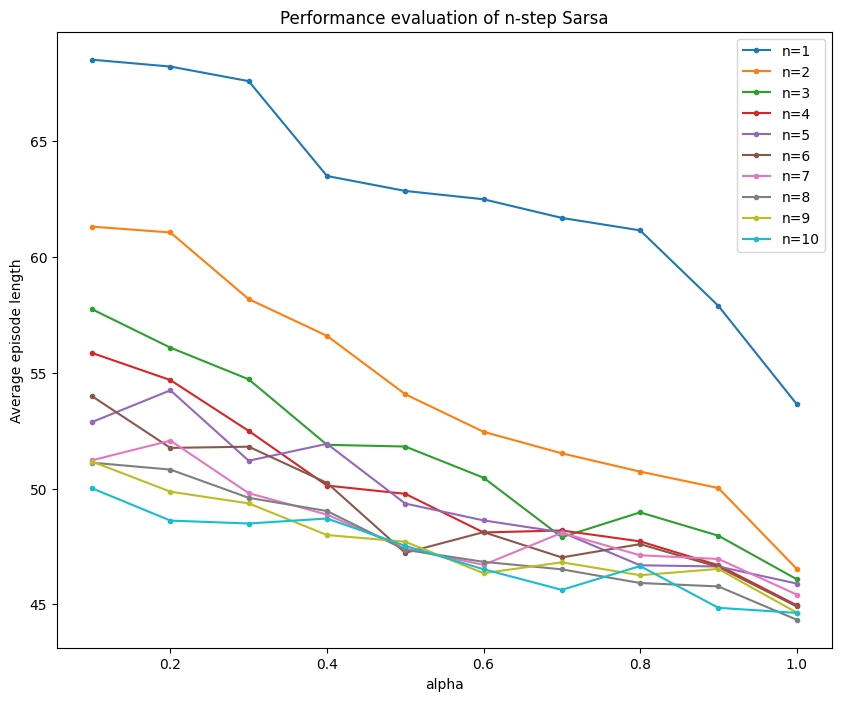

In [18]:
%matplotlib inline
plt.figure(figsize=(10,8))
n=1
for l in L:
  x = []
  y = []
  for alpha,ep in l:
    x.append(alpha)
    y.append(ep)

  plt.plot(x,y,'.-',label="n={}".format(n))
  n +=1

plt.title("Performance evaluation of n-step Sarsa")
plt.xlabel("alpha")
plt.ylabel("Average episode length")
plt.legend()
plt.show()
  

In [19]:

n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.random.rand(n_states,n_actions)

Q[-1,:]=0

In [20]:

Q

array([[0.67580313, 0.58530688, 0.01123308, 0.56471598],
       [0.91664852, 0.5890413 , 0.22167208, 0.97252109],
       [0.44510267, 0.72757517, 0.37323457, 0.68545057],
       [0.56291849, 0.08484822, 0.14728632, 0.67477131],
       [0.71610249, 0.09472536, 0.99040719, 0.52718333],
       [0.52379547, 0.71326038, 0.02810834, 0.06768521],
       [0.41586306, 0.95346043, 0.29611464, 0.9744541 ],
       [0.91197985, 0.15180907, 0.92995877, 0.23658844],
       [0.84585847, 0.21292598, 0.92340131, 0.84218315],
       [0.61688478, 0.72353476, 0.23560529, 0.28216882],
       [0.04204037, 0.91837758, 0.96166665, 0.88260042],
       [0.99838475, 0.40424996, 0.49490004, 0.72506357],
       [0.95367158, 0.21717836, 0.6538285 , 0.48801468],
       [0.25127999, 0.58687033, 0.50411289, 0.18986991],
       [0.57009239, 0.8700244 , 0.58716608, 0.36309317],
       [0.10653937, 0.79552906, 0.69433752, 0.14804783],
       [0.44811763, 0.70996299, 0.87629038, 0.43662647],
       [0.39542992, 0.37712682,

### CartPole

In [21]:
import gym, numpy as np, matplotlib.pyplot as plt
from neural_networks.policy_gradient_utilities import PolicyGradient

In [22]:
n_units = 5
gamma = .99
batch_size = 50
learning_rate = 1e-3
n_episodes = 10000
render = False
goal = 190
n_layers = 2
n_classes = 2
environment = gym.make('CartPole-v1')
environment_dimension = 4

In [23]:
def calculate_discounted_reward(reward, gamma=gamma):
    output = [reward[i] * gamma**i for i in range(0, len(reward))]
    
    return output[::-1]

In [24]:
def score_model(model, n_tests, render=render):
   scores = []
   for _ in range(n_tests):
     environment.reset()
     observation = environment.reset()
     reward_sum = 0
     while True:
        if render:
            environment.render()

        state = np.reshape(observation, [1, environment_dimension])
        predict = model.predict([state])[0]
        action = np.argmax(predict)
        observation, reward, done, _, _ = environment.step(action)
        reward_sum += reward
       
        if done:
           break
        scores.append(reward_sum)
        
        environment.close()
        return np.mean(scores)

In [25]:
def cart_pole_game(environment, policy_model, model_predictions):
    loss = []
    n_episode, reward_sum, score, episode_done = 0, 0, 0, False
    n_actions = environment.action_space.n
    observation = environment.reset()
    states = np.empty(0).reshape(0, environment_dimension)
    actions = np.empty(0).reshape(0, 1)
    rewards = np.empty(0).reshape(0, 1)
    discounted_rewards = np.empty(0).reshape(0, 1)

    while n_episode < n_episodes:
        state = np.array(observation)[None, :]  # Convert to numpy array and add an extra dimension
        prediction = model_predictions.predict(state)[0]
        action = np.random.choice(range(environment.action_space.n), p=prediction)
        states = np.vstack([states, state])
        actions = np.vstack([actions, action])
        observation, reward, episode_done, info = environment.step(action)
        reward_sum += reward
        rewards = np.vstack([rewards, reward])

        if episode_done == True:
            discounted_reward = calculate_discounted_reward(rewards)
            discounted_rewards = np.vstack([discounted_rewards, discounted_reward])
            rewards = np.empty(0).reshape(0, 1)

        if (n_episode + 1) % batch_size == 0:
            discounted_rewards -= discounted_rewards.mean()
            discounted_rewards /= discounted_rewards.std()
            discounted_rewards = discounted_rewards.squeeze()
            actions = actions.squeeze().astype(int)
            train_actions = np.zeros([len(actions), n_actions])
            train_actions[np.arange(len(actions)), actions] = 1
            error = policy_model.train_on_batch([states, discounted_rewards], train_actions)
            loss.append(error)
            states = np.empty(0).reshape(0, environment_dimension)
            actions = np.empty(0).reshape(0, 1)
            discounted_rewards = np.empty(0).reshape(0, 1)
            score = score_model(model=model_predictions, n_tests=10)
            print('\nEpisode: %s \nAverage Reward: %s \nScore: %s \nError: %s' %(n_episode+1, reward_sum/float(batch_size), score, np.mean(loss[-batch_size:])))

        if score >= goal:
            break

        reward_sum = 0
        n_episode += 1
        observation = environment.reset()

    plt.title('Policy Gradient Error plot over %s Episodes'%(n_episode+1))
    plt.xlabel('N batches')
    plt.ylabel('Error Rate')
    plt.plot(loss)
    plt.show()


In [26]:
if __name__ == '__main__':
    mlp_model = PolicyGradient(
        n_units=n_units,
        n_layers=n_layers,
        n_columns=environment_dimension,
        n_outputs=n_classes,
        learning_rate=learning_rate,
        hidden_activation='selu',
        output_activation='softmax',
        loss_function='log_likelihood'
    )
    
    policy_model, model_predictions = mlp_model.create_policy_model(environment_dimension,)
    
    policy_model.summary()
    
    cart_pole_game(
        environment=environment,
        policy_model=policy_model,
        model_predictions=model_predictions
    )

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 5)            20          ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 2)            10          ['dense[0][0]']                  
                                                                                              

C:\Users\Fajri\AppData\Local\Temp\ipykernel_40428\908781028.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state = np.array(observation)[None, :]  # Convert to numpy array and add an extra dimension


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

## **Munti Carlo**

In [27]:
import gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
plt.style.use('ggplot')


def run_episode(env):

    states = []
    actions = []
    rewards = []
    state = env.reset()
    obs = env.reset()
    action = 0
    done = False
    while not done:
        #print("Observation:", obs)
        if obs[0] >= 20:
            # print("Stick")
            action = 0
        else:
            # print("Hit")
            action = 1

        obs, reward, done, _ = env.step(action)
        #print("Reward:", reward)
        # print("")
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        state = obs
    return states, actions, rewards


def first_visit_MC(env, num_episodes):

    # Value table for storing the values of each state
    value_table = defaultdict(float)
    n = defaultdict(int)

    for i in tqdm(range(num_episodes)):

        states, actions, rewards = run_episode(env)
        returns = 0

        # For each step calculate returns as a sum of rewards
        for t in range(len(states) - 1, -1, -1):
            S = states[t]
            R = rewards[t]

            returns += R

            # Check if the episode is visited for the first time =>
            # If Yes: Assign the value of the state as an average of returns

            if S not in states[:t]:
                n[S] += 1
                value_table[S] += (returns - value_table[S]) / n[S]

    return value_table


def plot_blackjack(V, ax1, ax2):
    player_sum = np.arange(12, 21 + 1)
    dealer_show = np.arange(1, 10 + 1)
    usable_ace = np.array([False, True])
    state_values = np.zeros(
        (len(player_sum), len(dealer_show), len(usable_ace)))

    for i, player in enumerate(player_sum):
        for j, dealer in enumerate(dealer_show):
            for k, ace in enumerate(usable_ace):
                state_values[i, j, k] = V[player, dealer, ace]

    X, Y = np.meshgrid(player_sum, dealer_show)

    ax1.plot_wireframe(X, Y, state_values[:, :, 0])
    ax2.plot_wireframe(X, Y, state_values[:, :, 1])

    for ax in ax1, ax2:
        ax.set_zlim(-1, 1)
        ax.set_ylabel('Player sum')
        ax.set_xlabel('Dealer showing')
        ax.set_zlabel('State Value')
    plt.show()


def main():
    # This example shows how to perform a single run with the policy that hits for player_sum >= 20
    env = gym.make('Blackjack-v1')
    episodes = 500000
    value = first_visit_MC(env, episodes)

    _, axes = plt.subplots(nrows=2, figsize=(
        6, 9), subplot_kw={'projection': '3d'})
    axes[0].set_title('No Usable ace')
    axes[1].set_title('Usable ace')
    plot_blackjack(value, axes[0], axes[1])


if __name__ == "__main__":
    main()

  0%|          | 0/500000 [00:00<?, ?it/s]


TypeError: '>=' not supported between instances of 'tuple' and 'int'

: 

In [22]:
import gym
import numpy as np

def run_episode(env, policy, gamma = 1.0, render = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , policy = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

def evaluate_policy(env, policy, gamma = 1.0, n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma = 1.0):
    policy = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy_v(env, policy, gamma=1.0):
    v = np.zeros(env.observation_space.n)
    eps = 1e-10
    while True:
        prev_v = np.copy(v)
        for s in range(env.observation_space.n):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            break
    return v

def policy_iteration(env, gamma = 1.0):
    policy = np.random.choice(env.action_space.n, size=(env.observation_space.n))  # initialize a random policy
    max_iterations = 200000
    gamma = 1.0
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            break
        policy = new_policy
    return policy

env_name  = 'FrozenLake8x8-v1'
env = gym.make(env_name)
optimal_policy = policy_iteration(env, gamma = 1.0)
scores = evaluate_policy(env, optimal_policy, gamma = 1.0)
print('Average scores = ', np.mean(scores))


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

: 

### Multi Armed Banditsa

current episode: 0
current episode: 100
current episode: 200
current episode: 300
current episode: 400
current episode: 500
current episode: 600
current episode: 700
current episode: 800
current episode: 900
current episode: 1000
current episode: 1100
current episode: 1200
current episode: 1300
current episode: 1400
current episode: 1500
current episode: 1600
current episode: 1700
current episode: 1800
current episode: 1900
current episode: 2000
current episode: 2100
current episode: 2200
current episode: 2300
current episode: 2400
current episode: 2500
current episode: 2600
current episode: 2700
current episode: 2800
current episode: 2900
current episode: 3000
current episode: 3100
current episode: 3200
current episode: 3300
current episode: 3400
current episode: 3500
current episode: 3600
current episode: 3700
current episode: 3800
current episode: 3900
current episode: 4000
current episode: 4100
current episode: 4200
current episode: 4300
current episode: 4400
current episode: 4500


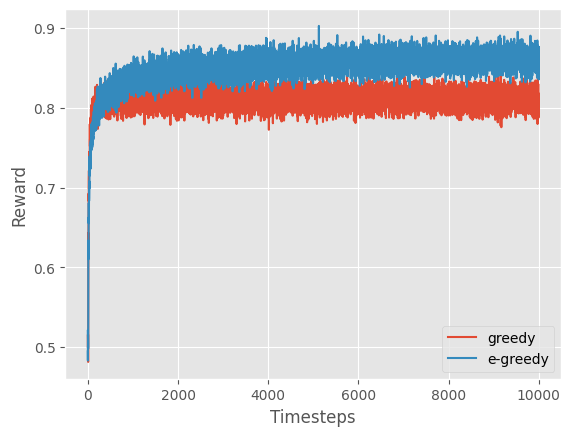

Enter:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


class GaussianBandit:
    def __init__(self):
        self._arm_means = np.random.uniform(0., 1., 10)  # Sample some means
        self.n_arms = len(self._arm_means)
        self.rewards = []
        self.total_played = 0

    def reset(self):
        self.rewards = []
        self.total_played = 0

    def play_arm(self, a):
        # Use sampled mean and covariance of 1.
        reward = np.random.normal(self._arm_means[a], 1.)
        self.total_played += 1
        self.rewards.append(reward)
        return reward


def greedy(bandit, timesteps):
    rewards = np.zeros(bandit.n_arms)
    n_plays = np.zeros(bandit.n_arms)
    Q = np.zeros(bandit.n_arms)
    possible_arms = range(bandit.n_arms)

    # TODO: init variables (rewards, n_plays, Q) by playing each arm once
    for i in range(bandit.n_arms):
        reward = bandit.play_arm(i)
        rewards[i] += reward
        n_plays[i] += 1
        Q[i] = rewards[i]/n_plays[i]

    # Main loop
    while bandit.total_played < timesteps:
        # This example shows how to play a random arm:
        '''
        a = random.choice(possible_arms)
        reward_for_a = bandit.play_arm(a)
        '''
        # TODO: instead do greedy action selection
        a = np.argmax(Q)
        reward = bandit.play_arm(a)

        # TODO: update the variables (rewards, n_plays, Q) for the selected arm
        rewards[a] += reward
        n_plays[a] += 1
        Q[a] = rewards[a]/n_plays[a]


def epsilon_greedy(bandit, timesteps, eps):
    # Inititialize
    rewards = np.zeros(bandit.n_arms)
    n_plays = np.zeros(bandit.n_arms)
    Q = np.zeros(bandit.n_arms)
    possible_arms = range(bandit.n_arms)

    # TODO: init variables (rewards, n_plays, Q) by playing each arm once
    for i in range(bandit.n_arms):
        reward = bandit.play_arm(i)
        rewards[i] += reward
        n_plays[i] += 1
        Q[i] = rewards[i]/n_plays[i]

    # TODO: epsilon greedy action selection (you can copy your code for greedy as a starting point)

    while bandit.total_played < timesteps:
        x = np.random.uniform()  # Uniform random distribution between [0,1]

        if x >= eps:  # Explore
            a = random.choice(possible_arms)
        else:         # Exploit
            a = np.argmax(Q)

        reward = bandit.play_arm(a)
        rewards[a] += reward
        n_plays[a] += 1
        Q[a] = rewards[a]/n_plays[a]


def main():
    n_episodes = 10000  # TODO: set to 10000 to decrease noise in plot
    n_timesteps = 10000

    eps = 0.9
    rewards_greedy = np.zeros(n_timesteps)
    rewards_egreedy = np.zeros(n_timesteps)

    for i in range(n_episodes):
        if i % 100 == 0:
            print("current episode: " + str(i))

        b = GaussianBandit()  # initializes a random bandit
        greedy(b, n_timesteps)
        rewards_greedy += b.rewards

        b.reset()  # reset the bandit before running epsilon_greedy
        epsilon_greedy(b, n_timesteps, eps)
        rewards_egreedy += b.rewards

    rewards_greedy /= n_episodes
    rewards_egreedy /= n_episodes
    plt.plot(rewards_greedy, label="greedy")
    print("Total reward of greedy strategy averaged over " +
          str(n_episodes) + " episodes: " + str(np.sum(rewards_greedy)))
    plt.plot(rewards_egreedy, label="e-greedy")
    print("Total reward of epsilon greedy strategy averaged over " +
          str(n_episodes) + " episodes: " + str(np.sum(rewards_egreedy)))
    plt.legend()
    plt.xlabel("Timesteps")
    plt.ylabel("Reward")
    plt.savefig('bandit_strategies.png')
    plt.show()
    print("Enter:")
    input()


if __name__ == "__main__":
    main()